# 1. Pytorch_basic

In [1]:
import torch

In [2]:
x = torch.tensor(3.5)

print(x)

tensor(3.5000)


#### 기울기 계산

In [3]:
x = torch.tensor(3.5, requires_grad=True)

print(x)

tensor(3.5000, requires_grad=True)


In [4]:
y = (x-1) * (x-2) * (x-3)

print(y)

tensor(1.8750, grad_fn=<MulBackward0>)


In [5]:
y.backward()    # 미분계산
x.grad          # x의 기울기

tensor(5.7500)

## 연쇄법칙(Chain Rule)

![image](https://user-images.githubusercontent.com/118172599/235351400-6c309dd3-ad25-4d88-b014-f8a942840f74.png)

![image](https://user-images.githubusercontent.com/118172599/235351404-3f9ebf9d-2ebc-4853-8936-0b5bd87afae0.png)


In [6]:
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

x = 2*a + 3*b
y = 5*a*a + 3*b**3
z = 2*x + 3*y

In [7]:
z.backward()    # 미분실행
a.grad          # a의 미분값

tensor(64.)

# 2. 보스턴 집값 예측

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 로드

In [9]:
from sklearn.datasets import fetch_openml
import pandas as pd

X, y = fetch_openml('boston', return_X_y=True, parser='auto', version=1)
df = X
df['TARGET'] = y
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## 칼럼 선정

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
cols = ["TARGET", "INDUS", "RM", "LSTAT", "NOX", "DIS"]
data = torch.tensor(df[cols].values).float()
data.shape

torch.Size([506, 6])

## 특성과 라벨로 분리

In [12]:
x = data[:, 1:]
y = data[:, :1]

print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


## 하이퍼파라미터

In [13]:
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

## 모델링

In [14]:
model = nn.Linear(x.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [15]:
# SGD(stochastic gradient descent, 확률적 경사하강법)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()   # optimizer 초기화
    loss.backward()     # 미분
    
    optimizer.step()    # 파라미터 업데이트
    
    if (i+1)%print_interval==0:
        print("Epoch %d: loss=%.4e" %(i+1, loss))

Epoch 100: loss=4.4202e+01
Epoch 200: loss=3.7470e+01
Epoch 300: loss=3.3772e+01
Epoch 400: loss=3.1688e+01
Epoch 500: loss=3.0513e+01
Epoch 600: loss=2.9850e+01
Epoch 700: loss=2.9476e+01
Epoch 800: loss=2.9266e+01
Epoch 900: loss=2.9146e+01
Epoch 1000: loss=2.9079e+01
Epoch 1100: loss=2.9041e+01
Epoch 1200: loss=2.9019e+01
Epoch 1300: loss=2.9006e+01
Epoch 1400: loss=2.8999e+01
Epoch 1500: loss=2.8994e+01
Epoch 1600: loss=2.8991e+01
Epoch 1700: loss=2.8989e+01
Epoch 1800: loss=2.8988e+01
Epoch 1900: loss=2.8987e+01
Epoch 2000: loss=2.8986e+01


## 모델 학습결과

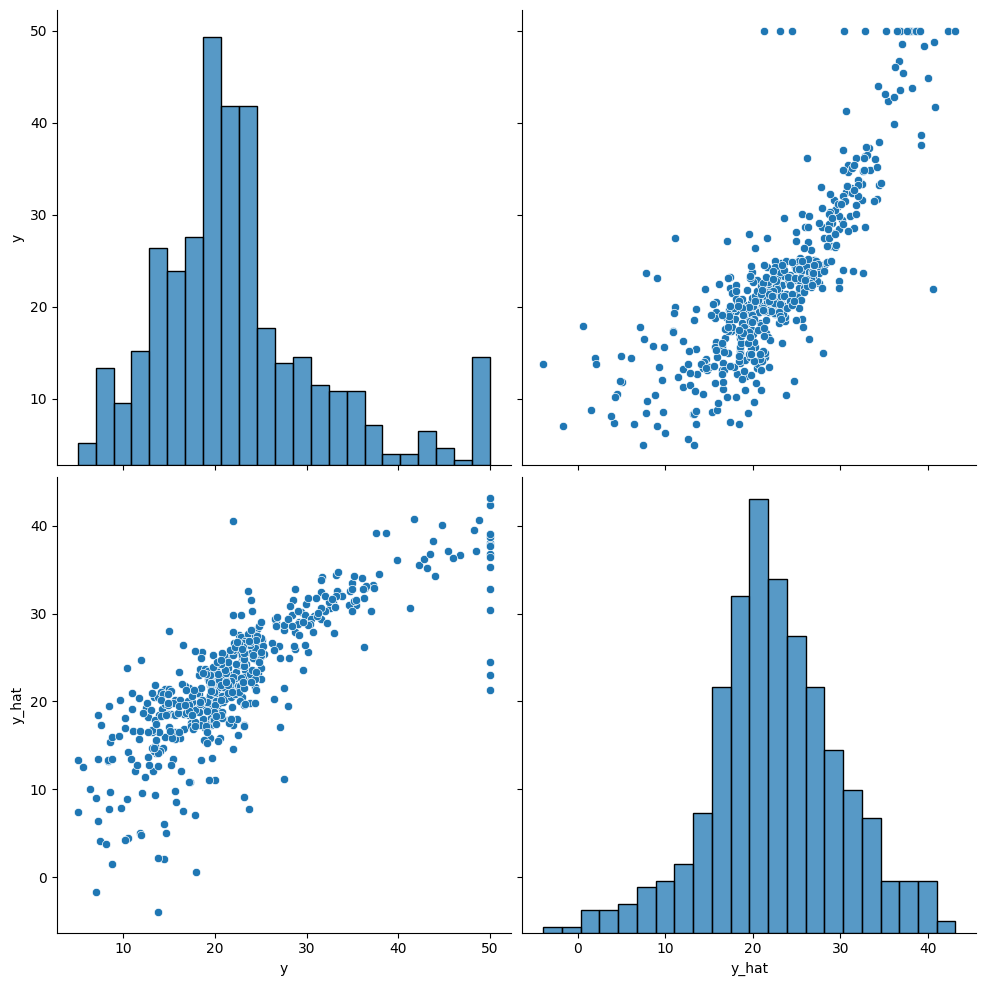

In [17]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])
sns.pairplot(df, height=5)
plt.show()

# 3. 유방암 예측

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 데이터 정리

In [20]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


## 칼럼 선정

In [21]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

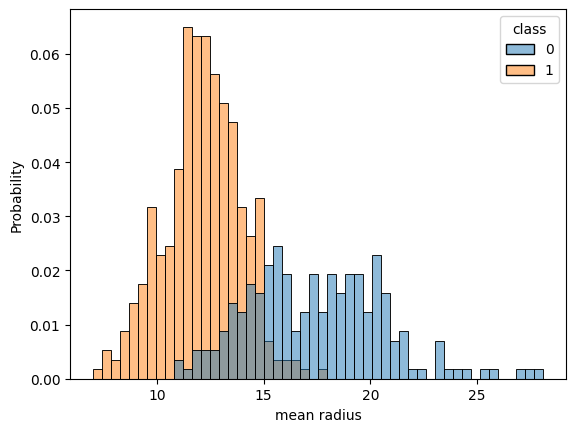

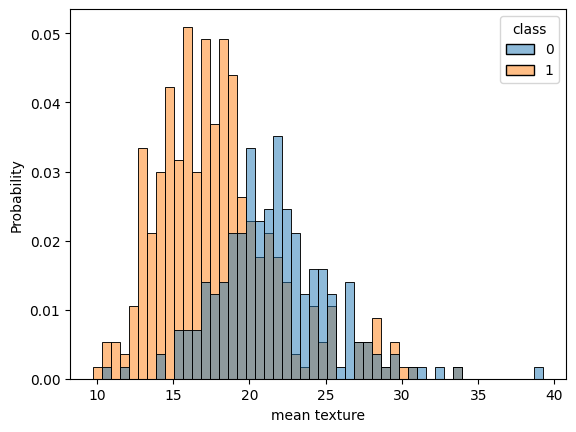

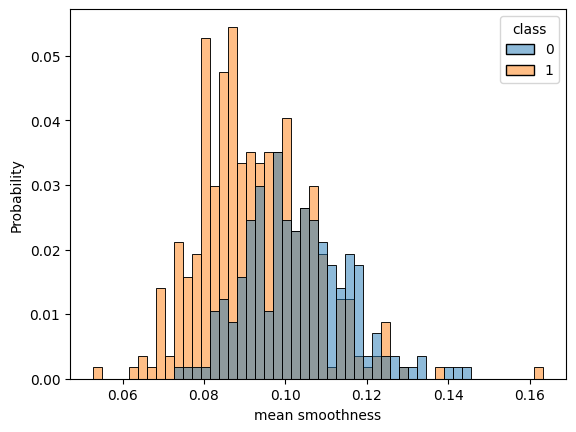

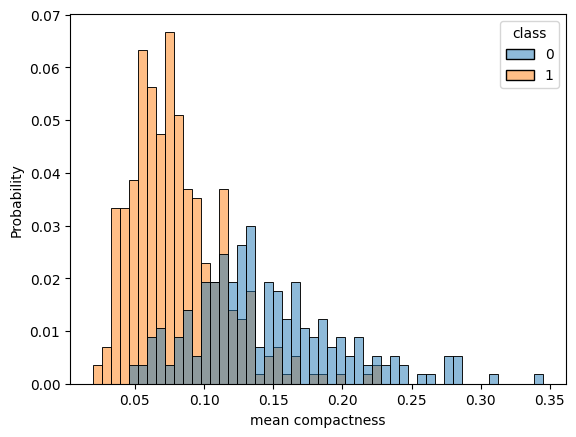

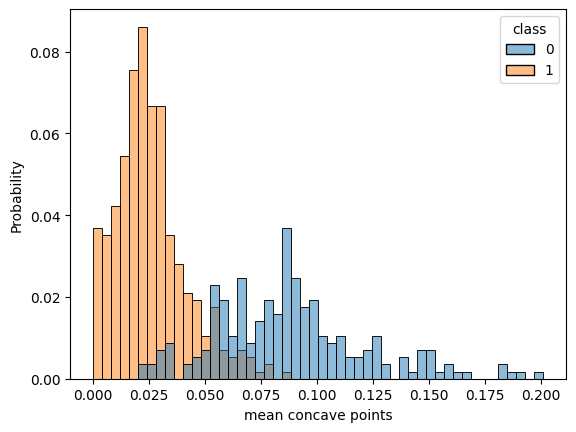

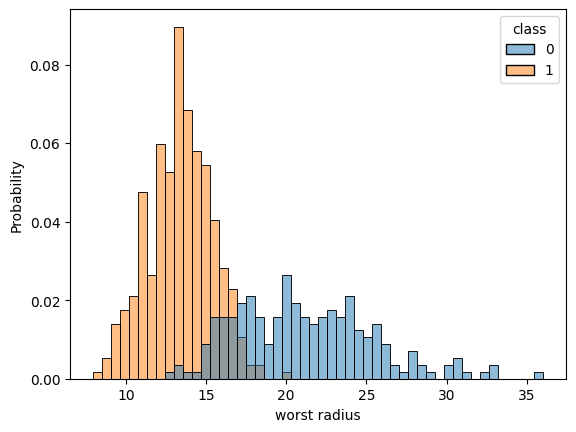

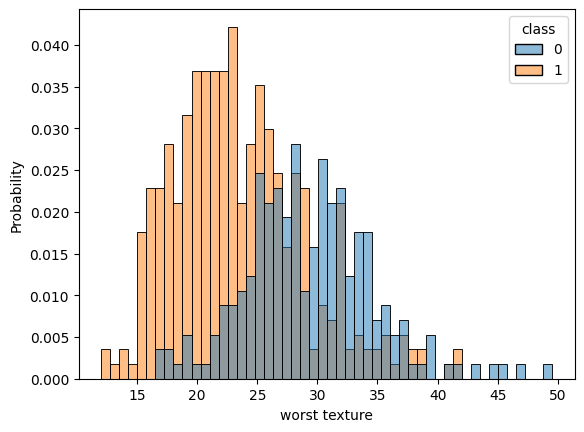

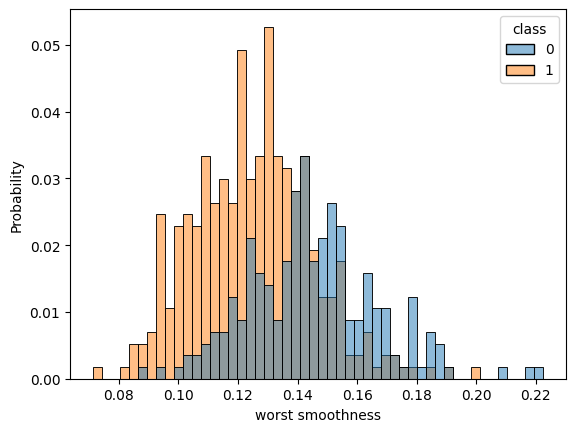

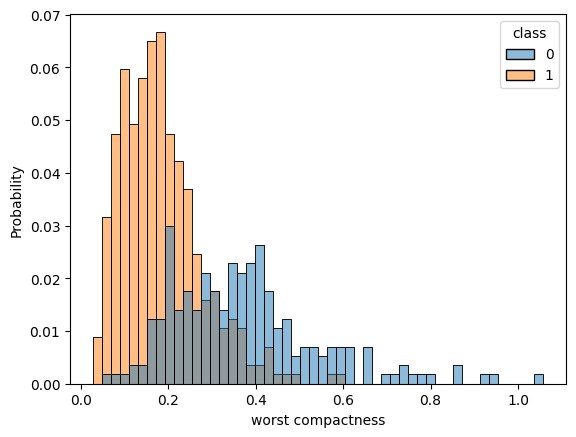

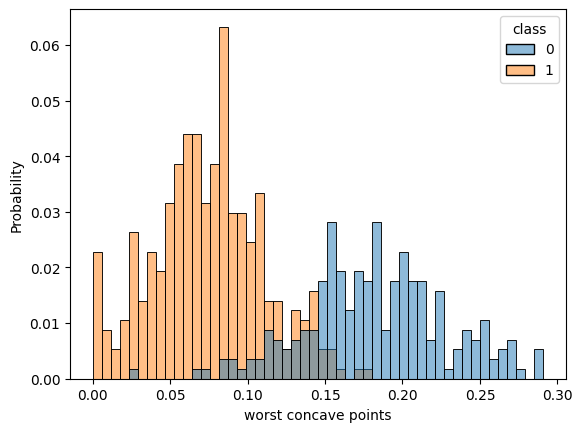

In [22]:
cols = ['mean radius', 'mean texture',
        'mean smoothness', 'mean compactness', 'mean concave points',
        'worst radius', 'worst texture',
         'worst smoothness', 'worst compactness', 'worst concave points',
         'class']

for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat="probability")
    plt.show()

## 데이터 분리

In [23]:
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([569, 11])

In [24]:
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


## 하이퍼파라미터

In [25]:
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

## 모델링

In [26]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.input_dim, self.output_dim = input_dim, output_dim
        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()
        
    def forward(self, x):
        y = self.act(self.linear(x))
        
        return y

In [27]:
model = MyModel(input_dim=x.size(-1),
                output_dim=y.size(-1))
crit = nn.BCELoss() # Binary Cross Entropy

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## 모델 학습

In [28]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1)%print_interval==0:
        print(f"Epoch {i+1}: loss={loss.item():.4f}")

Epoch 10000: loss=0.2796
Epoch 20000: loss=0.2299
Epoch 30000: loss=0.2003
Epoch 40000: loss=0.1811
Epoch 50000: loss=0.1677
Epoch 60000: loss=0.1578
Epoch 70000: loss=0.1503
Epoch 80000: loss=0.1443
Epoch 90000: loss=0.1395
Epoch 100000: loss=0.1355
Epoch 110000: loss=0.1321
Epoch 120000: loss=0.1292
Epoch 130000: loss=0.1267
Epoch 140000: loss=0.1245
Epoch 150000: loss=0.1226
Epoch 160000: loss=0.1209
Epoch 170000: loss=0.1194
Epoch 180000: loss=0.1180
Epoch 190000: loss=0.1167
Epoch 200000: loss=0.1156


## 모델 학습결과

In [29]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print("Accuracy: %.4f" %(correct_cnt/total_cnt))

Accuracy: 0.9649


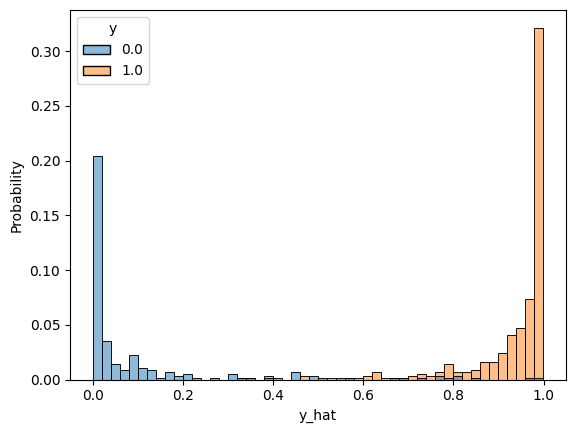

In [30]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=["y", "y_hat"])
sns.histplot(df, x="y_hat", hue="y", bins=50, stat="probability")
plt.show()

# 4. MNIST

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

## Set Cuda

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Current device is", device)

Current device is cpu


## Datasets Load

In [33]:
import os

In [34]:
os.listdir("../data")

['06_alice.txt',
 '06_alice_mask.png',
 '06_a_new_hope.txt',
 '06_stormtrooper_mask.png',
 'cifar',
 'creditcard.csv',
 'Face Mask Dataset',
 'goodbooks-10k',
 'graduation_project.png',
 'ml-latest-small',
 'MNIST',
 'mnist-in-csv',
 'mnist_png',
 'x09.txt',
 '주성분3개시각화.png']

In [35]:
train_data = datasets.MNIST(root="../data",   # data save path
                            train=True,       # train data
                            download=True,    # download on
                            transform=transforms.ToTensor())

test_data = datasets.MNIST(root="../data",    # data save path
                            train=False,      # test data
                            transform=transforms.ToTensor())

print("number of training data: ", len(train_data))
print("number of test data: ", len(test_data))

number of training data:  60000
number of test data:  10000


## Data Check

In [36]:
image, label = train_data[0]
image.shape, image.squeeze().shape
# 첫번째 차원이 channel

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

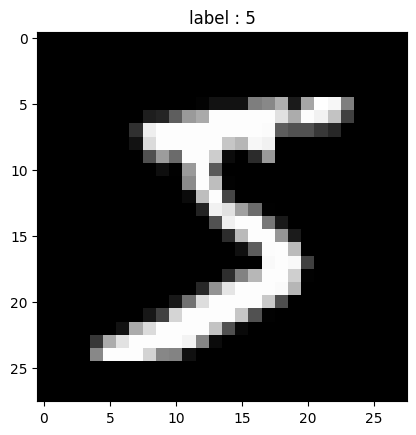

In [37]:
plt.imshow(image.squeeze().numpy(), cmap="gray")
plt.title("label : %s" %label)
plt.show()

## Mini batch configure

In [38]:
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                           batch_size=batch_size,
                                           shuffle=True)

first_batch = train_loader.__iter__().__next__()
print("{:15s} | {:<25s} | {}".format("name", "type", "size"))
print("{:15s} | {:<25s} | {}".format("Num of Batch", "", len(train_loader)))
print("{:15s} | {:<25s} | {}".format("first_batch", str(type(first_batch)), len(first_batch)))
print("{:15s} | {:<25s} | {}".format("first_batch[0]", str(type(first_batch[0])), first_batch[0].shape))
print("{:15s} | {:<25s} | {}".format("first_batch[1]", str(type(first_batch[1])), first_batch[1].shape))

name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


## Modeling
- nn.Linear(3136, 1000)으로 설정되어 있다
- (28,28) -> MaxPooling2d 2번 -> (7,7) 여기에 channel_cnt를 곱함
- 하지만 연결계층의 입력크기는 일반적으로 특징을 잘 포착할 수 있을 만큼 크게 선택됨
- 입력크기 너무 크면 과적합, 작으면 정보를 모두 포착하지 못해서 올바른 학습불가
- 따라서 시행착오를 통해서 최적의 입력크기를 찾아야한다

In [42]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, padding="same")
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding="same")
        self.dropout = nn.Dropout2d(0.25)

        self.fc1 = nn.Linear(3136, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        
        x = self.dropout(x)
        x = torch.flatten(x,1)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        
        return output

In [43]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

## Model Learning

In [44]:
from time import time

model.train()
i = 1
for epoch in range(epoch_num):
    start_time_each_epoch = time()
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if i%1000==0:
            print("Time: %.3f\tTrain Step: %d\tLoss: %.3f\t" %(time() - start_time_each_epoch, i, loss.item()))
        i+=1

Time: 81.436	Train Step: 1000	Loss: 0.191	
Time: 69.932	Train Step: 2000	Loss: 0.033	
Time: 53.119	Train Step: 3000	Loss: 0.014	
Time: 52.150	Train Step: 4000	Loss: 0.132	
Time: 22.078	Train Step: 5000	Loss: 0.192	
Time: 136.500	Train Step: 6000	Loss: 0.178	
Time: 114.181	Train Step: 7000	Loss: 0.048	
Time: 90.783	Train Step: 8000	Loss: 0.018	
Time: 68.979	Train Step: 9000	Loss: 0.020	
Time: 43.789	Train Step: 10000	Loss: 0.005	
Time: 20.056	Train Step: 11000	Loss: 0.055	
Time: 97.013	Train Step: 12000	Loss: 0.000	
Time: 78.883	Train Step: 13000	Loss: 0.027	
Time: 62.891	Train Step: 14000	Loss: 0.005	
Time: 47.510	Train Step: 15000	Loss: 0.003	
Time: 31.382	Train Step: 16000	Loss: 0.000	
Time: 15.918	Train Step: 17000	Loss: 0.001	
Time: 95.073	Train Step: 18000	Loss: 0.018	


## Model Eval

In [45]:
model.eval()
correct = 0

for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()
    
print("Test set: Accuracy: %.2f" %(100.*correct / len(test_loader.dataset)))

Test set: Accuracy: 99.08
